# Importing Libraries

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for data preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# for model training 

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

# for model evaluation 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

# miscellaneous

import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Loan_Data.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

# Exploratory Data Analysis

In [3]:
df.shape                                # gives number of rows and colomns

(614, 13)

In [4]:
df.columns                              # give all the column names

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df["Loan_Amount_Term"].unique()         # Explore some of the collumns and check their values

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [6]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [7]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [8]:
df.describe()                           # give all the statistical information

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [9]:
df.info()                                 # gives all the basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.isna().sum()                          # ckecks if the column have missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# checking if any columns have outliers

<Axes: >

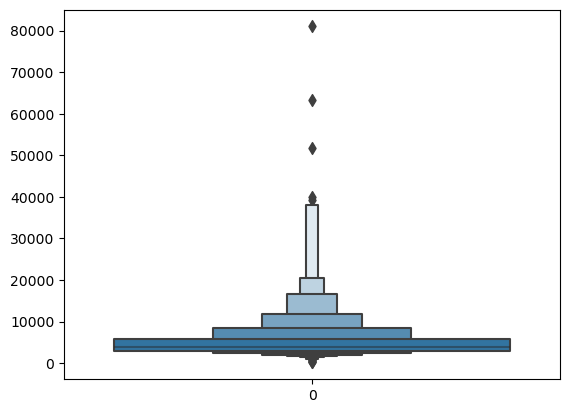

In [12]:
sns.boxenplot(df["ApplicantIncome"])

<Axes: >

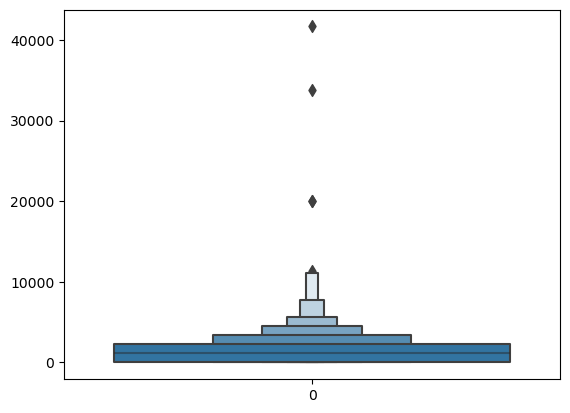

In [13]:
sns.boxenplot(df["CoapplicantIncome"])

<Axes: >

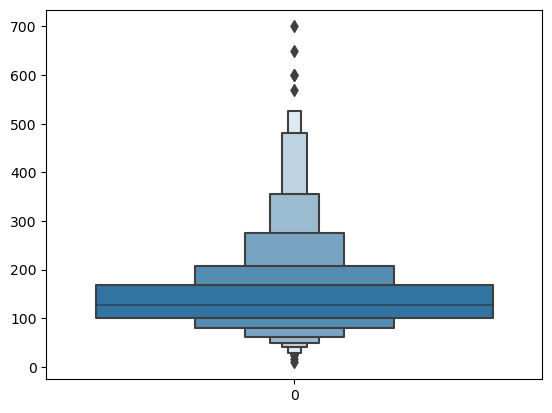

In [14]:
sns.boxenplot(df["LoanAmount"])

<Axes: >

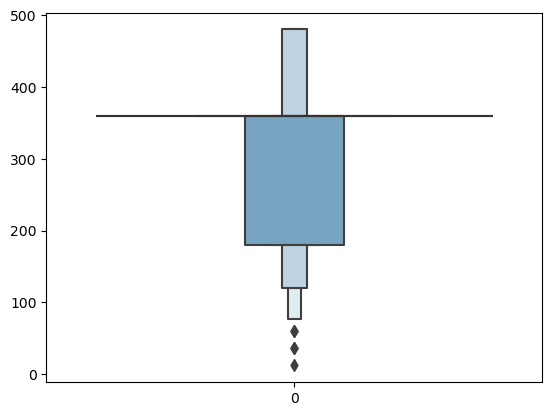

In [15]:
sns.boxenplot(df["Loan_Amount_Term"])

<Axes: >

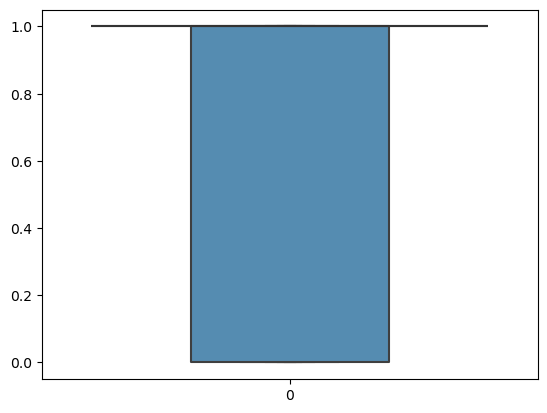

In [16]:
sns.boxenplot(df["Credit_History"])

In [17]:
# Check outliers

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

LowerTail = Q1-1.5*IQR
UpperTail = Q3+1.5*IQR

In [19]:
show_outliers = (df<LowerTail)|(df>UpperTail)
outlier_count = show_outliers.sum()
outlier_count

ApplicantIncome      50
CoapplicantIncome    18
Credit_History       89
Dependents            0
Education             0
Gender                0
LoanAmount           39
Loan_Amount_Term     88
Loan_ID               0
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [20]:
# finding correlation

<Axes: >

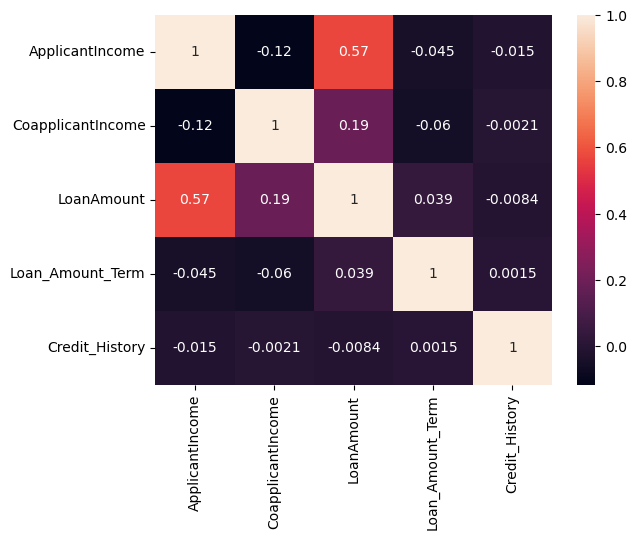

In [21]:
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

## droping unnecessary collumns

In [22]:
df = df.drop(["Loan_ID"],axis=1)
df

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

## Handling Outliers

In [23]:
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column >= lower_bound) & (column <= upper_bound)]

In [24]:
new_df = df.apply(lambda col: remove_outliers(col) if np.issubdtype(col.dtype, np.number) else col)

In [25]:
new_df

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No           5849.0   
1      Male     Yes          1      Graduate            No           4583.0   
2      Male     Yes          0      Graduate           Yes           3000.0   
3      Male     Yes          0  Not Graduate            No           2583.0   
4      Male      No          0      Graduate            No           6000.0   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No           2900.0   
610    Male     Yes         3+      Graduate            No           4106.0   
611    Male     Yes          1      Graduate            No           8072.0   
612    Male     Yes          2      Graduate            No           7583.0   
613  Female      No          0      Graduate           Yes           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0               NaN             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             NaN   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

In [26]:
show_outliers = (new_df<LowerTail)|(new_df>UpperTail)
outlier_count = show_outliers.sum()
outlier_count

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

## Handling missing values

In [27]:
new_df.isna().sum()                          # ckecks if the column have missing values

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome       50
CoapplicantIncome     18
LoanAmount            61
Loan_Amount_Term     102
Credit_History       139
Property_Area          0
Loan_Status            0
dtype: int64

In [28]:
# Gender columns

In [29]:
new_df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [30]:
new_df["Gender"] = new_df["Gender"].fillna("Male")

In [31]:
# Married column

In [32]:
new_df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [33]:
new_df["Married"] = new_df["Married"].fillna("Yes")

In [34]:
# Dependents column

In [35]:
new_df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [36]:
new_df["Dependents"] = new_df["Dependents"].fillna("0")

In [37]:
# Self_Employed column

In [38]:
new_df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [39]:
new_df["Self_Employed"] = new_df["Self_Employed"].fillna("No")

In [40]:
# ApplicantIncome column

In [41]:
new_df["ApplicantIncome"].value_counts()

2500.0    9
6000.0    6
4583.0    6
2600.0    6
3750.0    5
         ..
3850.0    1
7787.0    1
3430.0    1
3975.0    1
7583.0    1
Name: ApplicantIncome, Length: 457, dtype: int64

In [42]:
new_df.describe()                                                              # check the statastical information of new_df

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       564.000000          596.00000  553.000000             512.0   
mean       4124.723404         1289.12906  129.000000             360.0   
std        1926.989806         1461.72508   47.927292               0.0   
min         150.000000            0.00000    9.000000             360.0   
25%        2744.000000            0.00000   99.000000             360.0   
50%        3638.500000         1031.00000  124.000000             360.0   
75%        5010.500000         2173.00000  158.000000             360.0   
max       10139.000000         5701.00000  267.000000             360.0   

       Credit_History  
count           475.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0

In [43]:
new_df["ApplicantIncome"] = new_df["ApplicantIncome"].fillna(4124.723404)         # mean value taken from new_df.describe()

In [44]:
# CoapplicantIncome

In [45]:
new_df["CoapplicantIncome"].value_counts()

0.0       273
2500.0      5
1666.0      5
2083.0      5
1459.0      3
         ... 
1010.0      1
1695.0      1
2598.0      1
1779.0      1
240.0       1
Name: CoapplicantIncome, Length: 270, dtype: int64

In [46]:
new_df["CoapplicantIncome"] = new_df["CoapplicantIncome"].fillna(0)

In [47]:
# LoanAmount

In [48]:
new_df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
63.0      1
156.0     1
65.0      1
53.0      1
253.0     1
Name: LoanAmount, Length: 169, dtype: int64

In [49]:
new_df["LoanAmount"] = new_df["LoanAmount"].fillna(129.000000)                     # mean value taken from new_df.describe()

In [50]:
# Loan_Amount_Term

In [51]:
new_df["Loan_Amount_Term"].value_counts()

360.0    512
Name: Loan_Amount_Term, dtype: int64

In [52]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [53]:
new_df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(360.0)                  # used df instead of new_df so data will get different values

In [54]:
# Credit_History

In [55]:
new_df["Credit_History"].value_counts()

1.0    475
Name: Credit_History, dtype: int64

In [56]:
new_df["Credit_History"] = df["Credit_History"].fillna(1.0)                        # used df instead of new_df so data will get different values

In [57]:
new_df["Credit_History"].value_counts()         

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [58]:
new_df["Credit_History"].replace({1.0:"1",0.0:"0"},inplace=True)                   # converting float to string to perform label encoding

In [59]:
# checking data after imputation

In [60]:
new_df.isna().sum()       

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


## Encoding

In [62]:
label_encoder = LabelEncoder()

In [63]:
new_df["Gender"] = label_encoder.fit_transform(new_df["Gender"])
new_df["Married"] = label_encoder.fit_transform(new_df["Married"])
new_df["Dependents"] = label_encoder.fit_transform(new_df["Dependents"])
new_df["Education"] = label_encoder.fit_transform(new_df["Education"])
new_df["Self_Employed"] = label_encoder.fit_transform(new_df["Self_Employed"])
new_df["Credit_History"] = label_encoder.fit_transform(new_df["Credit_History"])
new_df["Loan_Status"] = label_encoder.fit_transform(new_df["Loan_Status"])

In [64]:
new_df = pd.get_dummies(new_df,columns = ["Property_Area"])               # OneHotEncoding

In [65]:
new_df.info()                                                             #all text data is converted into numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int32  
 1   Married                  614 non-null    int32  
 2   Dependents               614 non-null    int32  
 3   Education                614 non-null    int32  
 4   Self_Employed            614 non-null    int32  
 5   ApplicantIncome          614 non-null    float64
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    int32  
 10  Loan_Status              614 non-null    int32  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int32(7), u

In [66]:
new_df

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0           5849.0   
1         1        1           1          0              0           4583.0   
2         1        1           0          0              1           3000.0   
3         1        1           0          1              0           2583.0   
4         1        0           0          0              0           6000.0   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0           2900.0   
610       1        1           3          0              0           4106.0   
611       1        1           1          0              0           8072.0   
612       1        1           2          0              0           7583.0   
613       0        0           0          0              1           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0       129.0             360.0               1   
1               1508.0       128.0             360.0               1   
2                  0.0        66.0             360.0               1   
3               2358.0       120.0             360.0               1   
4                  0.0       141.0             360.0               1   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0               1   
610                0.0        40.0             180.0               1   
611              240.0       253.0             360.0               1   
612                0.0       187.0             360.0               1   
613                0.0       133.0             360.0               0   

     Loan_Status  Property_Area_Rural  Property_Area_Semiurban  \
0              1                    0                        0   
1              0                    1                        0   
2              1                    0                        0   
3              1                    0                        0   
4              1                    0                        0   
..           ...                  ...                      ...   
609            1                    1                        0   
610            1                    1                        0   
611            1                    0                        0   
612            1                    0                        0   
613            0                    0                        1   

     Property_Area_Urban  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1  
..                   ...  
609                    0  
610                    0  
611                    1  
612                    1  
613                    0  

[614 rows x 14 columns]

## Scaling

In [67]:
# standardization

In [68]:
#std_scaler = StandardScaler()                                             

In [69]:
#std_scaler.fit_transform(new_df)

In [70]:
# Normalization

In [71]:
MinMax = MinMaxScaler()

In [72]:
MinMax.fit_transform(new_df)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

# Feature Selection

In [73]:
# Linearity

In [74]:
new_df.corr()

Gender   Married  Dependents  Education  \
Gender                   1.000000  0.364569    0.172914   0.045364   
Married                  0.364569  1.000000    0.334216   0.012304   
Dependents               0.172914  0.334216    1.000000   0.055752   
Education                0.045364  0.012304    0.055752   1.000000   
Self_Employed           -0.000525  0.004489    0.056798  -0.010383   
ApplicantIncome          0.085673  0.015103    0.119208  -0.157563   
CoapplicantIncome        0.193294  0.229954   -0.077215  -0.010088   
LoanAmount               0.150158  0.182667    0.098481  -0.129718   
Loan_Amount_Term        -0.074030 -0.100912   -0.103864  -0.073928   
Credit_History           0.009170  0.010938   -0.040160  -0.073658   
Loan_Status              0.017987  0.091478    0.010118  -0.085884   
Property_Area_Rural      0.080283 -0.006805   -0.000816   0.077520   
Property_Area_Semiurban -0.108623  0.005845    0.001924  -0.039410   
Property_Area_Urban      0.034530  0.000546   -0.001198  -0.034279   

                         Self_Employed  ApplicantIncome  CoapplicantIncome  \
Gender                       -0.000525         0.085673           0.193294   
Married                       0.004489         0.015103           0.229954   
Dependents                    0.056798         0.119208          -0.077215   
Education                    -0.010383        -0.157563          -0.010088   
Self_Employed                 1.000000         0.187845          -0.047832   
ApplicantIncome               0.187845         1.000000          -0.202278   
CoapplicantIncome            -0.047832        -0.202278           1.000000   
LoanAmount                    0.101671         0.418350           0.220239   
Loan_Amount_Term             -0.033739        -0.035401           0.001608   
Credit_History               -0.001550         0.043710           0.005229   
Loan_Status                  -0.003700         0.015118           0.046243   
Property_Area_Rural           0.022065         0.087403           0.100816   
Property_Area_Semiurban       0.008710        -0.011926          -0.023376   
Property_Area_Urban          -0.030338        -0.072225          -0.073374   

                         LoanAmount  Loan_Amount_Term  Credit_History  \
Gender                     0.150158         -0.074030        0.009170   
Married                    0.182667         -0.100912        0.010938   
Dependents                 0.098481         -0.103864       -0.040160   
Education                 -0.129718         -0.073928       -0.073658   
Self_Employed              0.101671         -0.033739       -0.001550   
ApplicantIncome            0.418350         -0.035401        0.043710   
CoapplicantIncome          0.220239          0.001608        0.005229   
LoanAmount                 1.000000          0.080562       -0.003461   
Loan_Amount_Term           0.080562          1.000000       -0.004705   
Credit_History            -0.003461         -0.004705        1.000000   
Loan_Status               -0.029609         -0.022549        0.540556   
Property_Area_Rural        0.047001          0.034321       -0.020906   
Property_Area_Semiurban    0.036411          0.059141        0.035976   
Property_Area_Urban       -0.083068         -0.094279       -0.016934   

                         Loan_Status  Property_Area_Rural  \
Gender                      0.017987             0.080283   
Married                     0.091478            -0.006805   
Dependents                  0.010118            -0.000816   
Education                  -0.085884             0.077520   
Self_Employed              -0.003700             0.022065   
ApplicantIncome             0.015118             0.087403   
CoapplicantIncome           0.046243             0.100816   
LoanAmount                 -0.029609             0.047001   
Loan_Amount_Term           -0.022549             0.034321   
Credit_History              0.540556            -0.020906   
Loan_Status                 1.000000  

<Axes: >

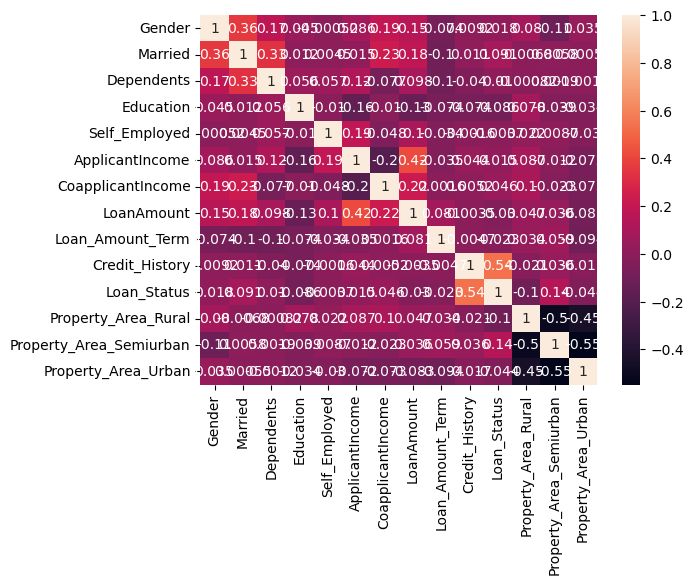

In [75]:
sns.heatmap(new_df.corr(),annot=True)

# Model Training

In [76]:
# spliting the training and testing data

In [77]:
x = new_df.drop(["Loan_Status"],axis=1)
y = new_df["Loan_Status"]

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Logistic Regression

In [79]:
log_reg = LogisticRegression()

In [80]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

# Model Evaluation For Logistic Regression

accuracy score for training = 0.8105906313645621
************************************************************
confusion matrix for training


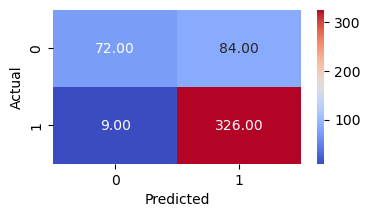

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.89      0.46      0.61       156
           1       0.80      0.97      0.88       335

    accuracy                           0.81       491
   macro avg       0.84      0.72      0.74       491
weighted avg       0.82      0.81      0.79       491



In [82]:
# for training

accuracy_Train = accuracy_score(y_train,y_train_pred)
print(f"accuracy score for training = {accuracy_Train}")
print("*"*60)
conf_matrix_Train = confusion_matrix(y_train,y_train_pred)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train = classification_report(y_train,y_train_pred)
print("classisfication report for training")
print(class_report_Train)

accuracy score for testing = 0.7804878048780488
************************************************************
confusion matrix for testing


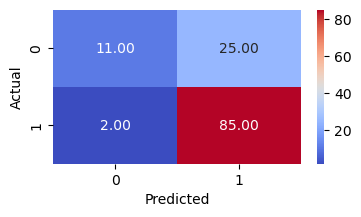

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.85      0.31      0.45        36
           1       0.77      0.98      0.86        87

    accuracy                           0.78       123
   macro avg       0.81      0.64      0.66       123
weighted avg       0.79      0.78      0.74       123



In [83]:
# for testing

accuracy_Test = accuracy_score(y_test,y_test_pred)
print(f"accuracy score for testing = {accuracy_Test}")
print("*"*60)
conf_matrix_Test = confusion_matrix(y_test,y_test_pred)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test = classification_report(y_test,y_test_pred)
print("classisfication report for testing")
print(class_report_Test)

In [84]:
result = []
 
def Final_result(model_name, acc_score_training, acc_score_testing):
     if model_name not in result:
            result.append([model_name, (acc_score_training*100),(acc_score_testing*100)])
            final_df = pd.DataFrame(result, columns=['Model Name', 'accurary score for training', 'accuracy score for testing'])
            return final_df

In [85]:
Final_result("Logistic Regression Training", accuracy_Train, accuracy_Test)

Model Name  accurary score for training  \
0  Logistic Regression Training                    81.059063   

   accuracy score for testing  
0                    78.04878

# ROC_Curve and ROC_AUC_Score

In [86]:
prob = log_reg.predict_proba(x_train)                                     #actual probabilities

In [87]:
fpr,tpr,th = roc_curve(y_train,prob[:,:1])

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

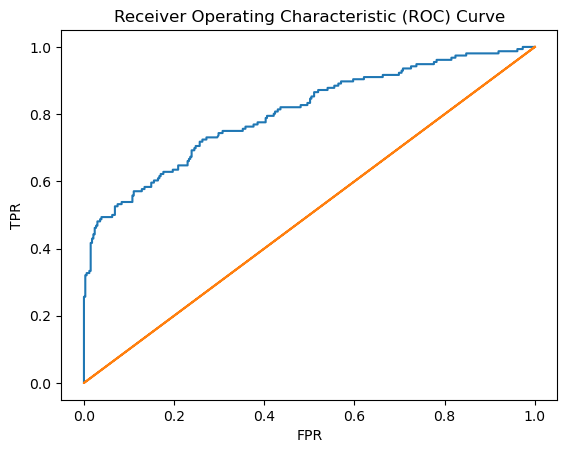

In [88]:
plt.plot(tpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(y_train,y_train)
plt.title("Receiver Operating Characteristic (ROC) Curve")

In [89]:
# ROC_AUC_Score                                                 # Area Under Curve (AUC) Score

In [90]:
ROC_AUC_Score = roc_auc_score(y_train,prob[:,:1])

In [91]:
print(f"Area Under Curve (AUC) Score = {ROC_AUC_Score}")

Area Under Curve (AUC) Score = 0.19671833141982395


# Decision Tree Classifier

In [92]:
dt_clf = DecisionTreeClassifier()

In [93]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
y_train_pred_dt = dt_clf.predict(x_train)
y_test_pred_dt = dt_clf.predict(x_test)

# Model Evaluation For Decision Tree Classifier

accuracy score for training = 0.9979633401221996
************************************************************
confusion matrix for training


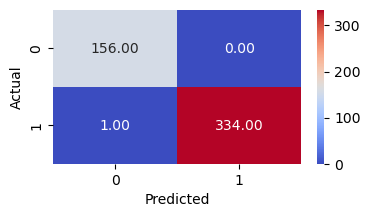

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       156
           1       1.00      1.00      1.00       335

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [95]:
# for training

accuracy_Train_dt = accuracy_score(y_train,y_train_pred_dt)
print(f"accuracy score for training = {accuracy_Train_dt}")
print("*"*60)
conf_matrix_Train_dt = confusion_matrix(y_train,y_train_pred_dt)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train_dt, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train_dt = classification_report(y_train,y_train_pred_dt)
print("classisfication report for training")
print(class_report_Train_dt)

accuracy score for testing = 0.6991869918699187
************************************************************
confusion matrix for testing


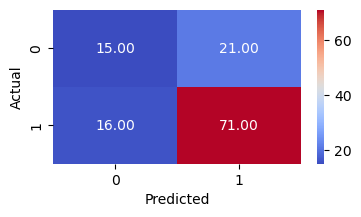

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.48      0.42      0.45        36
           1       0.77      0.82      0.79        87

    accuracy                           0.70       123
   macro avg       0.63      0.62      0.62       123
weighted avg       0.69      0.70      0.69       123



In [96]:
# for testing

accuracy_Test_dt = accuracy_score(y_test,y_test_pred_dt)
print(f"accuracy score for testing = {accuracy_Test_dt}")
print("*"*60)
conf_matrix_Test_dt = confusion_matrix(y_test,y_test_pred_dt)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test_dt, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test_dt = classification_report(y_test,y_test_pred_dt)
print("classisfication report for testing")
print(class_report_Test_dt)

# Plot Decision Tree

In [97]:
plt.figure(figsize=(200,160))
plot_tree(dt_clf, feature_names=x.columns,class_names=['0','1'],filled=True)
plt.show()

# Hyperparameter Tuning And Cross Validation

In [98]:
hyperparameters = {"criterion" : ['gini','entropy'],
                   "max_depth" : np.arange(3,6),
                   "min_samples_split" : np.arange(5,16),
                   "min_samples_leaf": np.arange(5,11)}

In [99]:
# cross validation

In [100]:
GSCV_dt_Model = GridSearchCV(dt_clf,hyperparameters,cv=5)

In [101]:
GSCV_dt_Model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5]),
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])})

In [102]:
GSCV_dt_Model.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=5)

In [103]:
Tuned_dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=5)

In [104]:
Tuned_dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=5)

In [105]:
y_train_pred_dt_tuned = Tuned_dt_model.predict(x_train)
y_test_pred_dt_tuned = Tuned_dt_model.predict(x_test)

# Model Evaluation After Tuning And Cross Validation

accuracy score for training = 0.8126272912423625
************************************************************
confusion matrix for training


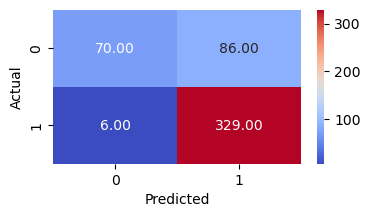

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.92      0.45      0.60       156
           1       0.79      0.98      0.88       335

    accuracy                           0.81       491
   macro avg       0.86      0.72      0.74       491
weighted avg       0.83      0.81      0.79       491



In [106]:
# for training

accuracy_Train_dt_tuned = accuracy_score(y_train,y_train_pred_dt_tuned)
print(f"accuracy score for training = {accuracy_Train_dt_tuned}")
print("*"*60)
conf_matrix_Train_dt_tuned = confusion_matrix(y_train,y_train_pred_dt_tuned)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train_dt_tuned, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train_dt_tuned = classification_report(y_train,y_train_pred_dt_tuned)
print("classisfication report for training")
print(class_report_Train_dt_tuned)

accuracy score for testing = 0.7967479674796748
************************************************************
confusion matrix for testing


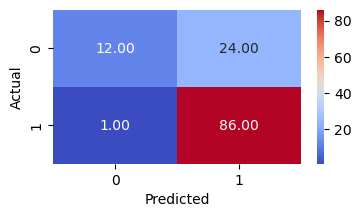

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



In [107]:
# For Testing

accuracy_Test_dt_tuned = accuracy_score(y_test,y_test_pred_dt_tuned)
print(f"accuracy score for testing = {accuracy_Test_dt_tuned}")
print("*"*60)
conf_matrix_Test_dt_tuned = confusion_matrix(y_test,y_test_pred_dt_tuned)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test_dt_tuned, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test_dt_tuned = classification_report(y_test,y_test_pred_dt_tuned)
print("classisfication report for testing")
print(class_report_Test_dt_tuned)

In [108]:
Final_result("Decision Tree Classifier",accuracy_Train_dt_tuned,accuracy_Test_dt_tuned)

Model Name  accurary score for training  \
0  Logistic Regression Training                    81.059063   
1      Decision Tree Classifier                    81.262729   

   accuracy score for testing  
0                   78.048780  
1                   79.674797

# Ensemble Learning Techniques

# Random Forest Classifier

In [109]:
rf_clf = RandomForestClassifier()

In [110]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
y_train_pred_rf = rf_clf.predict(x_train)
y_test_pred_rf = rf_clf.predict(x_test)

# Model Evaluation For Random Forest Classifier

accuracy score for training = 0.9979633401221996
************************************************************
confusion matrix for training


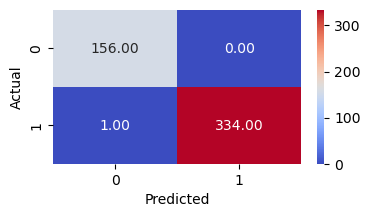

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       156
           1       1.00      1.00      1.00       335

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [112]:
# for training

accuracy_Train_rf = accuracy_score(y_train,y_train_pred_rf)
print(f"accuracy score for training = {accuracy_Train_rf}")
print("*"*60)
conf_matrix_Train_rf = confusion_matrix(y_train,y_train_pred_rf)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train_rf, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train_rf = classification_report(y_train,y_train_pred_rf)
print("classisfication report for training")
print(class_report_Train_rf)

accuracy score for testing = 0.7317073170731707
************************************************************
confusion matrix for testing


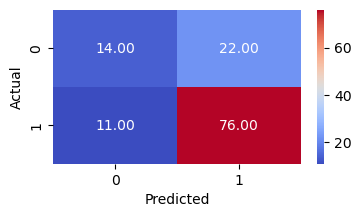

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        36
           1       0.78      0.87      0.82        87

    accuracy                           0.73       123
   macro avg       0.67      0.63      0.64       123
weighted avg       0.71      0.73      0.72       123



In [113]:
# for testing

accuracy_Test_rf = accuracy_score(y_test,y_test_pred_rf)
print(f"accuracy score for testing = {accuracy_Test_rf}")
print("*"*60)
conf_matrix_Test_rf = confusion_matrix(y_test,y_test_pred_rf)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test_rf, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test_rf = classification_report(y_test,y_test_pred_rf)
print("classisfication report for testing")
print(class_report_Test_rf)

# Hyperparameter Tuning And Cross Validation

In [114]:
Hyperparameters_rf = {"n_estimators":np.arange(10,200),
                      "criterion": ['gini','entropy'],
                      "max_depth" : np.arange(5,15),
                      "min_samples_split":np.arange(5,20),
                      "min_samples_leaf":np.arange(4,15),
                      "max_features":['auto']}

In [115]:
RSCV_rf_clf = RandomizedSearchCV(rf_clf,Hyperparameters_rf,cv=6)

In [116]:
RSCV_rf_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [117]:
RSCV_rf_clf.best_estimator_

RandomForestClassifier(max_depth=14, max_features='auto', min_samples_leaf=9,
                       min_samples_split=18, n_estimators=111)

In [118]:
Tuned_rf_model = RandomForestClassifier(max_depth=11, max_features='auto',
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=28)

In [119]:
Tuned_rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, max_features='auto', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=28)

In [120]:
y_train_pred_rf_tuned = Tuned_rf_model.predict(x_train)
y_test_pred_rf_tuned = Tuned_rf_model.predict(x_test)

# Model Evaluation After Hyperparameter Tuning And Cross Validation

accuracy score for training = 0.8370672097759674
************************************************************
confusion matrix for training


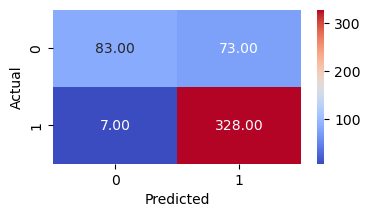

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.92      0.53      0.67       156
           1       0.82      0.98      0.89       335

    accuracy                           0.84       491
   macro avg       0.87      0.76      0.78       491
weighted avg       0.85      0.84      0.82       491



In [121]:
# for training

accuracy_Train_rf_tuned = accuracy_score(y_train,y_train_pred_rf_tuned)
print(f"accuracy score for training = {accuracy_Train_rf_tuned}")
print("*"*60)
conf_matrix_Train_rf_tuned = confusion_matrix(y_train,y_train_pred_rf_tuned)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train_rf_tuned, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train_rf_tuned = classification_report(y_train,y_train_pred_rf_tuned)
print("classisfication report for training")
print(class_report_Train_rf_tuned)

accuracy score for testing = 0.8048780487804879
************************************************************
confusion matrix for testing


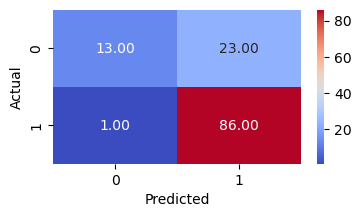

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.93      0.36      0.52        36
           1       0.79      0.99      0.88        87

    accuracy                           0.80       123
   macro avg       0.86      0.67      0.70       123
weighted avg       0.83      0.80      0.77       123



In [122]:
# For testing

accuracy_Test_rf_tuned = accuracy_score(y_test,y_test_pred_rf_tuned)
print(f"accuracy score for testing = {accuracy_Test_rf_tuned}")
print("*"*60)
conf_matrix_Test_rf_tuned = confusion_matrix(y_test,y_test_pred_rf_tuned)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test_rf_tuned, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test_rf_tuned = classification_report(y_test,y_test_pred_rf_tuned)
print("classisfication report for testing")
print(class_report_Test_rf_tuned)

In [123]:
Final_result("Random Forest Classifier",accuracy_Train_rf_tuned,accuracy_Test_rf_tuned)

Model Name  accurary score for training  \
0  Logistic Regression Training                    81.059063   
1      Decision Tree Classifier                    81.262729   
2      Random Forest Classifier                    83.706721   

   accuracy score for testing  
0                   78.048780  
1                   79.674797  
2                   80.487805

# Adaboost (Adaptive Boosting) Classifier

In [124]:
adb_clf = AdaBoostClassifier()

# Hyperparameter Tuning And Cross validation

In [125]:
hyp_adb = {"n_estimators":np.arange(10,200),
       "learning_rate" : np.array([0.01,0,0.1,1])}

In [126]:
rscv_adb_clf = RandomizedSearchCV(adb_clf, hyp_adb, cv = 6)

In [127]:
rscv_adb_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.01, 0.  , 0.1 , 1.  ]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [128]:
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=110)

In [129]:
tuned_adb_model = AdaBoostClassifier(learning_rate=0.01, n_estimators=82)

In [130]:
tuned_adb_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=82)

In [131]:
y_train_pred_abd_tuned = tuned_adb_model.predict(x_train)
y_test_pred_adb_tuned = tuned_adb_model.predict(x_test)

# Model Evaluation For AdaBoost Classiefier

accuracy score for training = 0.8126272912423625
************************************************************
confusion matrix for training


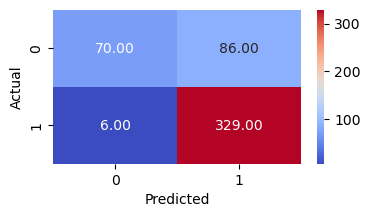

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.92      0.45      0.60       156
           1       0.79      0.98      0.88       335

    accuracy                           0.81       491
   macro avg       0.86      0.72      0.74       491
weighted avg       0.83      0.81      0.79       491



In [132]:
# for training 

accuracy_Train_adb_tuned = accuracy_score(y_train,y_train_pred_abd_tuned)
print(f"accuracy score for training = {accuracy_Train_adb_tuned}")
print("*"*60)
conf_matrix_Train_abd_tuned = confusion_matrix(y_train,y_train_pred_abd_tuned)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train_abd_tuned, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train_abd_tuned = classification_report(y_train,y_train_pred_abd_tuned)
print("classisfication report for training")
print(class_report_Train_abd_tuned)

accuracy score for testing = 0.7967479674796748
************************************************************
confusion matrix for testing


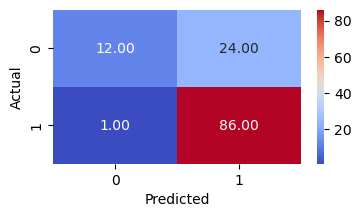

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



In [133]:
# for testing

accuracy_Test_adb_tuned = accuracy_score(y_test,y_test_pred_adb_tuned)
print(f"accuracy score for testing = {accuracy_Test_adb_tuned}")
print("*"*60)
conf_matrix_Test_adb_tuned = confusion_matrix(y_test,y_test_pred_adb_tuned)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test_adb_tuned, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test_adb_tuned = classification_report(y_test,y_test_pred_adb_tuned)
print("classisfication report for testing")
print(class_report_Test_adb_tuned)

In [134]:
Final_result("Adaboost Classifier",accuracy_Train_adb_tuned,accuracy_Test_adb_tuned)

Model Name  accurary score for training  \
0  Logistic Regression Training                    81.059063   
1      Decision Tree Classifier                    81.262729   
2      Random Forest Classifier                    83.706721   
3           Adaboost Classifier                    81.262729   

   accuracy score for testing  
0                   78.048780  
1                   79.674797  
2                   80.487805  
3                   79.674797

# K-Nearest-Neighbours Classifier

In [135]:
knn = KNeighborsClassifier()

# Hyperparameter Tuning And Cross Validation

In [136]:
hyp_knn = {"n_neighbors":np.arange(2,30),"p":[1,2]}

In [137]:
RSCV_KNN = GridSearchCV(knn, hyp_knn, cv=5)

In [138]:
RSCV_KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [139]:
RSCV_KNN.best_estimator_

KNeighborsClassifier(n_neighbors=23, p=1)

In [140]:
tuned_knn = KNeighborsClassifier(n_neighbors=23, p=1)

In [141]:
tuned_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23, p=1)

In [142]:
y_train_pred_knn_tuned = tuned_knn.predict(x_train)
y_test_pred_knn_tuned = tuned_knn.predict(x_test)

# Model Evaluation For KNN Classifier

accuracy score for training = 0.6985743380855397
************************************************************
confusion matrix for training


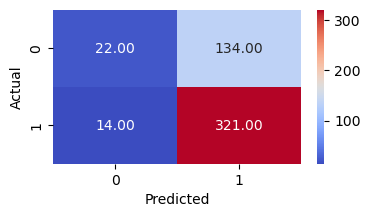

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.61      0.14      0.23       156
           1       0.71      0.96      0.81       335

    accuracy                           0.70       491
   macro avg       0.66      0.55      0.52       491
weighted avg       0.68      0.70      0.63       491



In [143]:
# for training

accuracy_Train_knn_tuned = accuracy_score(y_train,y_train_pred_knn_tuned)
print(f"accuracy score for training = {accuracy_Train_knn_tuned}")
print("*"*60)
conf_matrix_Train_knn_tuned = confusion_matrix(y_train,y_train_pred_knn_tuned)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train_knn_tuned, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train_knn_tuned = classification_report(y_train,y_train_pred_knn_tuned)
print("classisfication report for training")
print(class_report_Train_knn_tuned)

accuracy score for testing = 0.6747967479674797
************************************************************
confusion matrix for testing


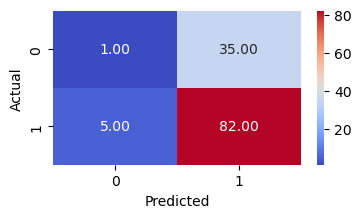

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.17      0.03      0.05        36
           1       0.70      0.94      0.80        87

    accuracy                           0.67       123
   macro avg       0.43      0.49      0.43       123
weighted avg       0.54      0.67      0.58       123



In [144]:
# for testing

accuracy_Test_knn_tuned = accuracy_score(y_test,y_test_pred_knn_tuned)
print(f"accuracy score for testing = {accuracy_Test_knn_tuned}")
print("*"*60)
conf_matrix_Test_knn_tuned = confusion_matrix(y_test,y_test_pred_knn_tuned)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test_knn_tuned, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test_knn_tuned = classification_report(y_test,y_test_pred_knn_tuned)
print("classisfication report for testing")
print(class_report_Test_knn_tuned)

In [145]:
Final_result("K-Nearest-Neighbours Classifier",accuracy_Train_knn_tuned,accuracy_Test_knn_tuned)

Model Name  accurary score for training  \
0     Logistic Regression Training                    81.059063   
1         Decision Tree Classifier                    81.262729   
2         Random Forest Classifier                    83.706721   
3              Adaboost Classifier                    81.262729   
4  K-Nearest-Neighbours Classifier                    69.857434   

   accuracy score for testing  
0                   78.048780  
1                   79.674797  
2                   80.487805  
3                   79.674797  
4                   67.479675

# Support Vector Machine

In [146]:
svc = SVC()

In [147]:
svc.fit(x_train,y_train)

SVC()

In [148]:
y_train_pred_scv = svc.predict(x_train)
y_test_pred_scv = svc.predict(x_test)

# Model Evaluation For Support Vector Machine

accuracy score for training = 0.6822810590631364
************************************************************
confusion matrix for training


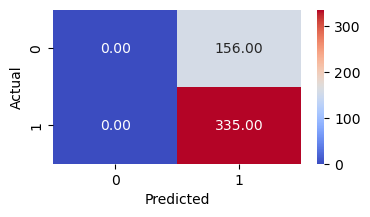

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       156
           1       0.68      1.00      0.81       335

    accuracy                           0.68       491
   macro avg       0.34      0.50      0.41       491
weighted avg       0.47      0.68      0.55       491



In [149]:
# for training

accuracy_Train_scv = accuracy_score(y_train,y_train_pred_scv)
print(f"accuracy score for training = {accuracy_Train_scv}")
print("*"*60)
conf_matrix_Train_svc = confusion_matrix(y_train,y_train_pred_scv)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train_svc, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train_svc = classification_report(y_train,y_train_pred_scv)
print("classisfication report for training")
print(class_report_Train_svc)

accuracy score for testing = 0.7073170731707317
************************************************************
confusion matrix for testing


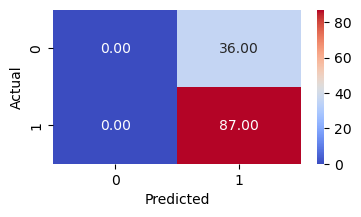

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.71      1.00      0.83        87

    accuracy                           0.71       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.50      0.71      0.59       123



In [150]:
# for testing

accuracy_Test_svc = accuracy_score(y_test,y_test_pred_scv)
print(f"accuracy score for testing = {accuracy_Test_svc}")
print("*"*60)
conf_matrix_Test_svc = confusion_matrix(y_test,y_test_pred_scv)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test_svc, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test_svc = classification_report(y_test,y_test_pred_scv)
print("classisfication report for testing")
print(class_report_Test_svc)

In [151]:
Final_result("Support Vector Classifier",accuracy_Train_scv,accuracy_Test_svc)

Model Name  accurary score for training  \
0     Logistic Regression Training                    81.059063   
1         Decision Tree Classifier                    81.262729   
2         Random Forest Classifier                    83.706721   
3              Adaboost Classifier                    81.262729   
4  K-Nearest-Neighbours Classifier                    69.857434   
5        Support Vector Classifier                    68.228106   

   accuracy score for testing  
0                   78.048780  
1                   79.674797  
2                   80.487805  
3                   79.674797  
4                   67.479675  
5                   70.731707

# Naive Bayes Classifier (BernoulliNB for Binary Classification)

In [152]:
bnb_clf = BernoulliNB()

In [153]:
bnb_clf.fit(x_train,y_train)

BernoulliNB()

In [154]:
y_train_pred_bnb = bnb_clf.predict(x_train)
y_test_pred_bnb = bnb_clf.predict(x_test)

# Model Evaluation For Naive Bayes Classifier

accuracy score for training = 0.814663951120163
************************************************************
confusion matrix for training


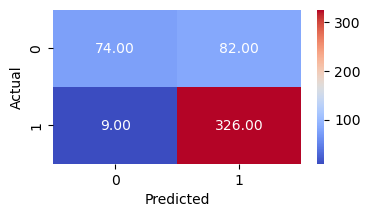

************************************************************
classisfication report for training
              precision    recall  f1-score   support

           0       0.89      0.47      0.62       156
           1       0.80      0.97      0.88       335

    accuracy                           0.81       491
   macro avg       0.85      0.72      0.75       491
weighted avg       0.83      0.81      0.80       491



In [155]:
# for training

accuracy_Train_bnb = accuracy_score(y_train,y_train_pred_bnb)
print(f"accuracy score for training = {accuracy_Train_bnb}")
print("*"*60)
conf_matrix_Train_bnb = confusion_matrix(y_train,y_train_pred_bnb)
print("confusion matrix for training")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Train_bnb, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Train_bnb = classification_report(y_train,y_train_pred_bnb)
print("classisfication report for training")
print(class_report_Train_bnb)

accuracy score for testing = 0.7886178861788617
************************************************************
confusion matrix for testing


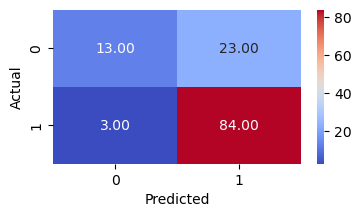

************************************************************
classisfication report for testing
              precision    recall  f1-score   support

           0       0.81      0.36      0.50        36
           1       0.79      0.97      0.87        87

    accuracy                           0.79       123
   macro avg       0.80      0.66      0.68       123
weighted avg       0.79      0.79      0.76       123



In [156]:
# for testing

accuracy_Test_bnb = accuracy_score(y_test,y_test_pred_bnb)
print(f"accuracy score for testing = {accuracy_Test_bnb}")
print("*"*60)
conf_matrix_Test_bnb = confusion_matrix(y_test,y_test_pred_bnb)
print("confusion matrix for testing")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_Test_bnb, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*"*60)
class_report_Test_bnb = classification_report(y_test,y_test_pred_bnb)
print("classisfication report for testing")
print(class_report_Test_bnb)

In [157]:
Final_result("Naive Bayes Classifier (BernoulliNB)",accuracy_Train_bnb,accuracy_Test_bnb)

Model Name  accurary score for training  \
0          Logistic Regression Training                    81.059063   
1              Decision Tree Classifier                    81.262729   
2              Random Forest Classifier                    83.706721   
3                   Adaboost Classifier                    81.262729   
4       K-Nearest-Neighbours Classifier                    69.857434   
5             Support Vector Classifier                    68.228106   
6  Naive Bayes Classifier (BernoulliNB)                    81.466395   

   accuracy score for testing  
0                   78.048780  
1                   79.674797  
2                   80.487805  
3                   79.674797  
4                   67.479675  
5                   70.731707  
6                   78.861789

# Model Evaluation Conclusion

In [158]:
final_evaluation = pd.DataFrame(result,columns=["Model Name","Accuracy Score For Training","Accuracy Score For Testing"])
final_evaluation

Model Name  Accuracy Score For Training  \
0          Logistic Regression Training                    81.059063   
1              Decision Tree Classifier                    81.262729   
2              Random Forest Classifier                    83.706721   
3                   Adaboost Classifier                    81.262729   
4       K-Nearest-Neighbours Classifier                    69.857434   
5             Support Vector Classifier                    68.228106   
6  Naive Bayes Classifier (BernoulliNB)                    81.466395   

   Accuracy Score For Testing  
0                   78.048780  
1                   79.674797  
2                   80.487805  
3                   79.674797  
4                   67.479675  
5                   70.731707  
6                   78.861789

In [159]:
# Conclusion